In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import numpy as np

In [2]:
skycross_experiment = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
skycross_experiment

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [3]:
skycross_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [4]:
skycross_experiment_new = skycross_experiment.dropna()
skycross_experiment_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


In [5]:
skycross_experiment_new.groupby('id_group')['id_client'].count()

id_group
control    5171
test       5669
Name: id_client, dtype: int64

In [6]:
def statistical_analysis(r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    if type(r) is not list and type(r) is not tuple:
        print('Нужен список или кортеж!')
        return
    if len(r) <= 4:
        print('Требуется более длинный ряд')
        return
    r = pd.Series(r)
    avg_r = r.mean()
    var_r = r.var()
    std_r = r.std()
    print ('Среднее значение = ', avg_r)
    print ('Дисперсия = ', var_r)
    print ('Ст. отклонение = ', std_r)
    
    qs = np.quantile(r, q)
    for i in range (len(q)):
        if q[i] == 0.5:
            print('Медиана = ', qs[i])
        if q[i] == 0.25:
            print('Первый квартиль = ', qs[i])
        if q[i] == 0.75:
            print('Третий квартиль = ', qs[i])
        elif q[i]*100 % 10==0:
            print("Дециль номер",q[i]*10," = ",qs[i])
        print("Квантиль ",q[i]," = ",qs[i])
            
    sns.histplot(r)
        
    return avg_r, var_r, std_r, qs

Среднее значение =  3568.7580258302582
Дисперсия =  8568932.941996625
Ст. отклонение =  2927.27397795229
Дециль номер 1.0  =  410.0
Квантиль  0.1  =  410.0
Первый квартиль =  1250.75
Квантиль  0.25  =  1250.75
Дециль номер 3.0  =  1590.0
Квантиль  0.3  =  1590.0
Дециль номер 4.0  =  2329.6000000000004
Квантиль  0.4  =  2329.6000000000004
Медиана =  3173.5
Дециль номер 5.0  =  3173.5
Квантиль  0.5  =  3173.5
Дециль номер 6.0  =  3934.0
Квантиль  0.6  =  3934.0
Третий квартиль =  5356.5
Квантиль  0.75  =  5356.5
Дециль номер 9.0  =  7088.200000000001
Квантиль  0.9  =  7088.200000000001


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([ 410.  , 1250.75, 1590.  , 2329.6 , 3173.5 , 3934.  , 5356.5 ,
        7088.2 ]))

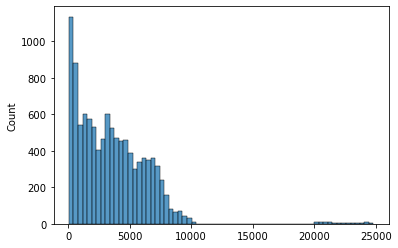

In [7]:
statistical_analysis(skycross_experiment_new['sum_pay'].values.tolist())

Среднее значение =  3422.1146473106273
Дисперсия =  5970737.65014
Ст. отклонение =  2443.509289963924
Дециль номер 1.0  =  407.5
Квантиль  0.1  =  407.5
Первый квартиль =  1234.25
Квантиль  0.25  =  1234.25
Дециль номер 3.0  =  1573.5
Квантиль  0.3  =  1573.5
Дециль номер 4.0  =  2299.0
Квантиль  0.4  =  2299.0
Медиана =  3151.5
Дециль номер 5.0  =  3151.5
Квантиль  0.5  =  3151.5
Дециль номер 6.0  =  3891.0
Квантиль  0.6  =  3891.0
Третий квартиль =  5260.75
Квантиль  0.75  =  5260.75
Дециль номер 9.0  =  6989.5
Квантиль  0.9  =  6989.5


(3422.1146473106273,
 5970737.65014,
 2443.509289963924,
 array([ 407.5 , 1234.25, 1573.5 , 2299.  , 3151.5 , 3891.  , 5260.75,
        6989.5 ]))

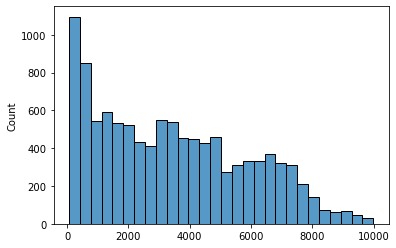

In [27]:
skycross_experiment_new1 = skycross_experiment_new[skycross_experiment_new['sum_pay'] < 10000]
skycross_experiment_new1
statistical_analysis(skycross_experiment_new1['sum_pay'].values.tolist())

In [9]:
skycross_experiment_new1_c = skycross_experiment_new1.loc[skycross_experiment_new1['id_group'] == 'control']
skycross_experiment_new1_c

,id_client,id_group,sum_pay,id_point,months_reg
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
4,1360376,control,760.0,1178.0,14
7,1373231,control,4008.0,1179.0,0
9,1373288,control,4109.0,1179.0,8
...,...,...,...,...,...
10966,1391333,control,2704.0,1182.0,5
10969,1389984,control,1818.0,1182.0,2
10970,1362847,control,2055.0,1178.0,4
10971,1359021,control,799.0,1178.0,3


In [10]:
skycross_experiment_new1_t = skycross_experiment_new1.loc[skycross_experiment_new1['id_group'] == 'test']
skycross_experiment_new1_t

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
3,1370042,test,7211.0,1179.0,3
5,1371160,test,218.0,1179.0,5
6,1372110,test,1295.0,1179.0,1
8,1372555,test,4708.0,1179.0,9
...,...,...,...,...,...
10967,1359429,test,3371.0,1178.0,3
10968,1359869,test,6590.0,1178.0,5
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


<AxesSubplot:xlabel='sum_pay', ylabel='Count'>

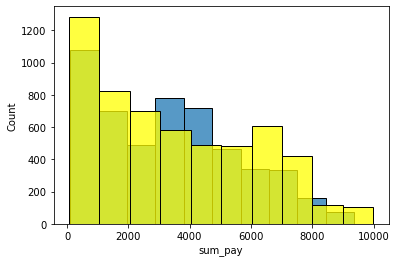

In [11]:
sns.histplot(skycross_experiment_new1_c['sum_pay'], bins = 10)
sns.histplot(skycross_experiment_new1_t['sum_pay'], color = 'yellow', bins = 10)

In [12]:
def show_hist (df1, df2): 
    for segment in (df1, df2): 
        print (sns.histplot (df1, bins = 10) and sns.histplot (df2, color = 'yellow', bins = 10))        

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


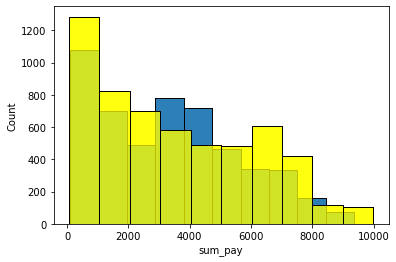

In [13]:
show_hist(skycross_experiment_new1_c['sum_pay'], skycross_experiment_new1_t['sum_pay'])

In [14]:
def mann_whitney_func (r1, r2, alpha=0.05):
    s, p = mannwhitneyu(r1, r2, alternative = 'two-sided')
    print(f'Статистика = {s}, p_value = {p}')
    if p <= alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')

In [15]:
def test_calc(r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1, r2)
    if p <= alpha:
        print('Нулевая гипотеза о равенстве средних не принимается')
    else:
        print('Нулевая гипотеза о равенстве средних принимается')
    return s, p

In [16]:
test_calc(skycross_experiment_new1_c['sum_pay'], skycross_experiment_new1_t['sum_pay'])

Нулевая гипотеза о равенстве средних не принимается


(-3.356159831664094, 0.0007930687003032978)

In [17]:
mann_whitney_func(skycross_experiment_new1_c['sum_pay'], skycross_experiment_new1_t['sum_pay'])

Статистика = 14141330.5, p_value = 0.09764037292812035
Распределения равны


### Вывод: данные двух тестов противоречат друг другу. Успех АБ-теста не подтвержден

In [18]:
skycross_experiment_new1['id_point'].unique()

array([1199., 1182., 1178., 1179., 1186., 1188.])

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


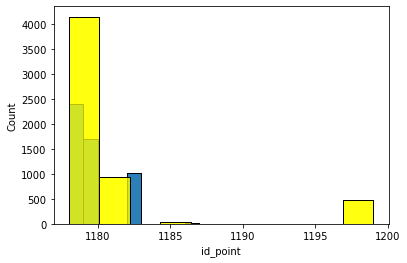

In [19]:
show_hist (skycross_experiment_new1_c['id_point'], skycross_experiment_new1_t['id_point'])    

Анализ точки 1199.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
1199.0


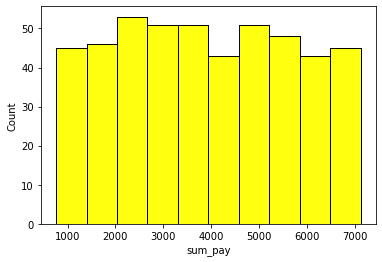

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Анализ точки 1182.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
1182.0


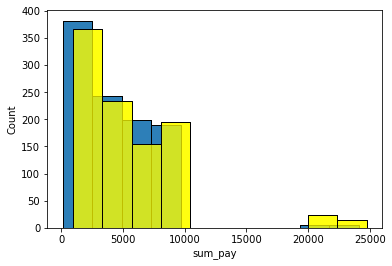

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Результат теста Стьюдента
Нулевая гипотеза о равенстве средних не принимается
Результат теста Манна-Уитни
Статистика = 393479.5, p_value = 1.1124584663860242e-17
Распределения не равны
Анализ точки 1178.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
1178.0


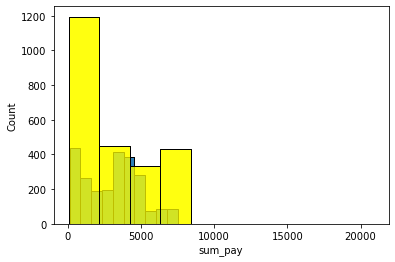

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Результат теста Стьюдента
Нулевая гипотеза о равенстве средних принимается
Результат теста Манна-Уитни
Статистика = 3122337.5, p_value = 1.726831770480401e-06
Распределения не равны
Анализ точки 1179.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
1179.0


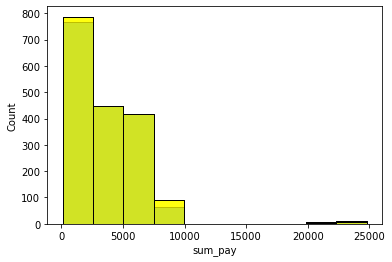

Результат теста Стьюдента
Нулевая гипотеза о равенстве средних принимается
Результат теста Манна-Уитни
Статистика = 1480894.5, p_value = 0.3990241720224209
Распределения равны
Анализ точки nan
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
nan


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


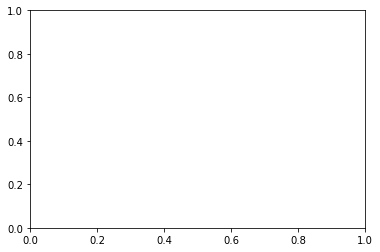

Анализ точки 1186.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
1186.0


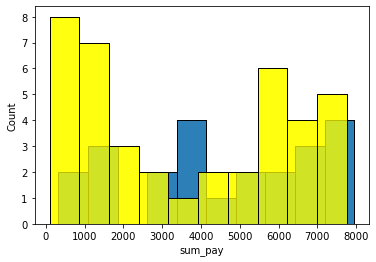

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Результат теста Стьюдента
Нулевая гипотеза о равенстве средних принимается
Результат теста Манна-Уитни
Статистика = 553.0, p_value = 0.18665794088873022
Распределения равны
Анализ точки 1188.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
1188.0


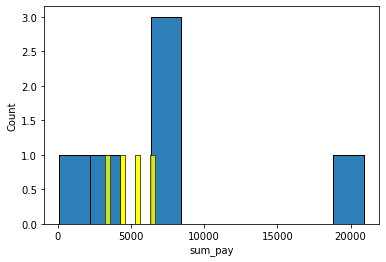

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
control = skycross_experiment[skycross_experiment['id_group'] == 'control']
test = skycross_experiment[skycross_experiment['id_group'] == 'test']

for point in skycross_experiment['id_point'].unique():
    print ('Анализ точки', point)

    df_loc_control = control[control['id_point'] == point]
    df_loc_test = test[test['id_point'] == point]
    
    show_hist(df_loc_control['sum_pay'], df_loc_test['sum_pay'])
    print(point)
    plt.show()
    
    df_loc_control.dropna(inplace = True)
    df_loc_test.dropna(inplace = True)
    if df_loc_control['sum_pay'].size > 5 and df_loc_test['sum_pay'].size > 5:
        print('Результат теста Стьюдента')
        test_calc(df_loc_control['sum_pay'], df_loc_test['sum_pay'])
        print('Результат теста Манна-Уитни')
        mann_whitney_func(df_loc_control['sum_pay'], df_loc_test['sum_pay'])

## Выводы:

По точке 1199.0 имеются данные только по тестовой группе, контрольных результатов нет, 
сделать вывод об активности пользователей и успехе теста невозможно

В точке 1182.0 эксперимент показал себя успешно, пользователи проявили активность в время акции

Анализ точки 1178.0 показал, что экперимент не привел к значительному увеличению продаж

Анализ точки 1179.0 показал, что эксперимент не привел к увеличению продаж

Анализ точки 1186.0 показал, что эксперимент не привел к увеличению продаж

Анализ точки 1188.0 показал, что данных по эксперименту недостаточно, 
сделать вывод об активности пользователей и успехе теста невозможно

In [21]:
def proxi_ranges (r1, r2, alpha=0.05):
#     Дисперсии и ковариации рядов
    disp_x1 = r1.var()
    disp_x2 = r2.var()
    cov_x1 = np.cov(r1)
    cov_x2 = np.cov(r2)
    print(f'Ковариация ряда 1 = {cov_x1}, Ковариация ряда 2 = {cov_x2}')    
    print(f'Дисперсия ряда 1 = {disp_x1}, Дисперсия ряда 2 = {disp_x2}')  
#     Корреляции Пирсона и Спирмена
    a, pvalue_1 = pearsonr(r1, r2)
    b, pvalue_2 = spearmanr(r1, r2)
    if pvalue_1 < alpha:
        print ('Корреляция Пирсона равна 0')
    elif a < 0.3:
        print ('Слабая корреляция Пирсона')
    elif a >= 0.3 and a <= 0.7:
        print ('Средняя корреляция Пирсона')
    else:
        print ('Сильная корреляция Пирсона')
    print(a, pvalue_1)
#     Результаты анализа корреляции Спирмена
    if pvalue_2 < alpha:
        print ('Корреляция Спирмена равна 0')
    elif b < 0.3:
        print ('Слабая корреляция Спирмена')
    elif b >= 0.3 and b <= 0.7:
        print ('Средняя корреляция Спирмена')
    else:
        print ('Сильная корреляция Спирмена')
    print(b, pvalue_2)

Ковариация ряда 1 = 50758347.6, Ковариация ряда 2 = 16.400000000000002
Дисперсия ряда 1 = 50758347.6, Дисперсия ряда 2 = 16.4
Средняя корреляция Пирсона
0.6551508176832866 0.15787654015956243
Корреляция Спирмена равна 0
0.8116794499134279 0.04985758510134035


<AxesSubplot:xlabel='sum_pay', ylabel='months_reg'>

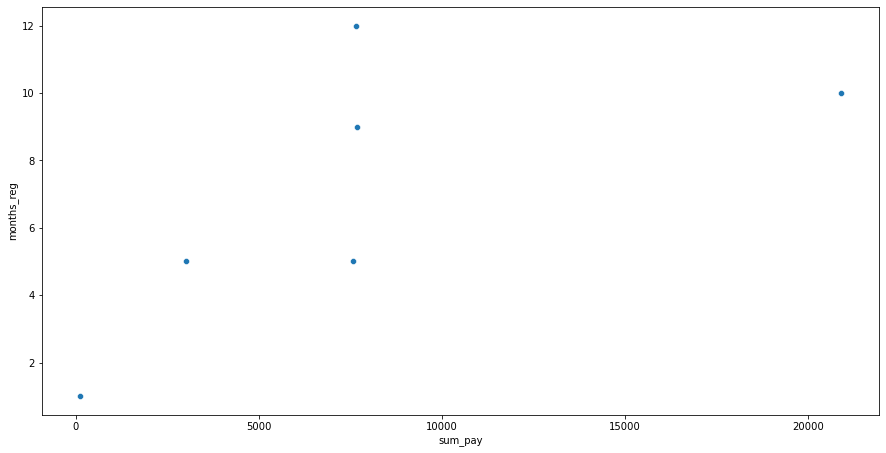

In [31]:
proxi_ranges (df_loc_control['sum_pay'], df_loc_control['months_reg'])

plt.figure(figsize = (15,7.5))
sns.scatterplot(x = df_loc_control['sum_pay'],
               y = df_loc_control['months_reg'])

Ковариация ряда 1 = 2220118.0, Ковариация ряда 2 = 1.6666666666666665
Дисперсия ряда 1 = 2220118.0, Дисперсия ряда 2 = 1.6666666666666667
Средняя корреляция Пирсона
0.6195015361732203 0.38049846382677965
Средняя корреляция Спирмена
0.6000000000000001 0.3999999999999999


<AxesSubplot:xlabel='sum_pay', ylabel='months_reg'>

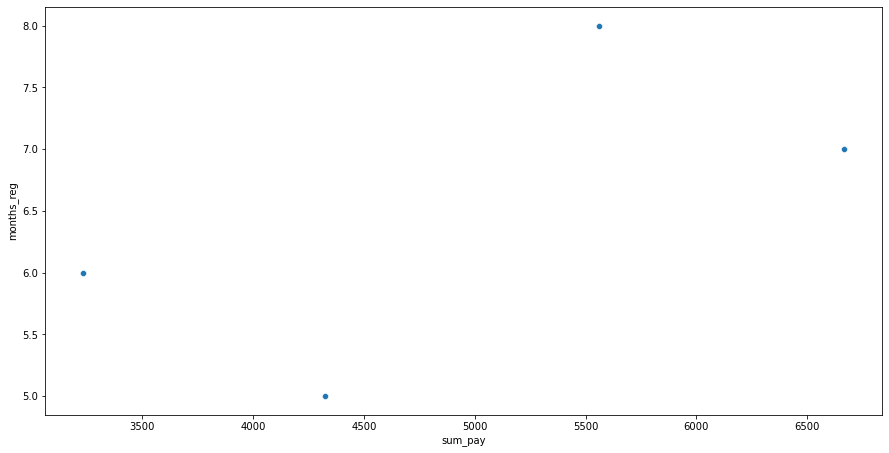

In [33]:
proxi_ranges (df_loc_test['sum_pay'], df_loc_test['months_reg'])

plt.figure(figsize = (15,7.5))
sns.scatterplot(x = df_loc_test['sum_pay'],
               y = df_loc_test['months_reg'])

## Вывод

Лояльность и интерес клиентов к акции связаны с длительностью регистрации, 
но эта связь не смогла обеспечить высокие результаты эксперимента

# Внедрение изменений в программу лояльности не рекомендовано